In [41]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torchvision import transforms, datasets
from torchvision.models import resnet18
from matplotlib import pyplot as plt
import h5py
import copy
import glob
import gc
from PIL import Image
import numpy as np
from utils import Rescale, CNNModelCustomSet, CNNModelFontsSet

In [42]:
def evaluate_model(model, dataloader):
    model.eval()  # Set model to evaluate mode
    
    by_class_predict = dict()
    
    # Iterate over data.
    for inputs, labels in dataloader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        labels = labels.numpy()
        preds = preds.numpy()
        
        for label, predict in zip(labels, preds):
            by_class_predict.setdefault(label, []).append(predict)
    return by_class_predict

In [43]:
ds_test = datasets.ImageFolder(root='./markup/test/', transform=transforms.Compose([Rescale((18, 28)), transforms.Grayscale(1), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]))
test_loader = DataLoader(ds_test, batch_size=50, shuffle=True, num_workers=8)

In [44]:
path_prefix = './runtime_data/ResNet-18Custom/'
model = resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3,bias=False)
model.fc = nn.Linear(model.fc.in_features, 26)
model.load_state_dict(torch.load(path_prefix + 'modelResNet-18Custom.torch'))

<All keys matched successfully>

In [45]:
by_class_predict = evaluate_model(model, test_loader)
print(by_class_predict)
by_class_error = dict()
by_class_count_charters = dict({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0,
                                10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0,
               17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0}) 
for class_name in [*by_class_predict]:
    error_counter = 0
    for prediction in by_class_predict[class_name]:
        if prediction != class_name:
            error_counter += 1
            by_class_count_charters[class_name] += 1;
            by_class_count_charters[prediction] += 1;
            
print(by_class_count_charters)

{11: [11, 11, 11, 11], 15: [15, 15, 15, 15], 4: [4, 4, 4, 4], 20: [20, 20, 20, 20], 19: [19, 19, 19, 19], 0: [0, 0, 0, 0], 13: [13, 13, 13, 13], 7: [7, 7, 7, 7], 25: [25, 25, 25, 25], 2: [2, 2, 2, 2], 5: [5, 5, 5, 5], 8: [8, 8, 8, 8], 21: [21, 21, 21, 21], 17: [17, 17, 17, 17], 24: [24, 24, 24, 24], 6: [6, 6, 6, 6], 14: [14, 14, 14, 3], 18: [18, 18, 18, 18], 9: [9, 9, 9, 9], 1: [1, 1, 1, 1], 10: [10, 10, 10, 10], 22: [22, 22, 22, 22], 3: [3, 3, 3, 3], 12: [12, 12, 12, 12], 23: [23, 23, 23, 23]}
{0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0}


In [49]:
common_count = 0
for class_name in sorted(by_class_predict):
    common_count += len(by_class_predict[class_name])
 
for class_name in sorted(by_class_predict):
    print("Class = "+ str(class_name))
    print("Count error = "+ str(by_class_count_charters[class_name]))
    print("Predicted = "+ str(by_class_predict[class_name]))
    print("error =" +str(by_class_count_charters[class_name] / common_count))
    by_class_error[class_name] = by_class_count_charters[class_name]/ len(by_class_predict[class_name]) if by_class_count_charters[class_name] != 0 else 0
by_class_error[16] = 0
print(by_class_error)

100
Class = 0
Count error = 0
Predicted = [0, 0, 0, 0]
error =0.0
Class = 1
Count error = 0
Predicted = [1, 1, 1, 1]
error =0.0
Class = 2
Count error = 0
Predicted = [2, 2, 2, 2]
error =0.0
Class = 3
Count error = 1
Predicted = [3, 3, 3, 3]
error =0.01
Class = 4
Count error = 0
Predicted = [4, 4, 4, 4]
error =0.0
Class = 5
Count error = 0
Predicted = [5, 5, 5, 5]
error =0.0
Class = 6
Count error = 0
Predicted = [6, 6, 6, 6]
error =0.0
Class = 7
Count error = 0
Predicted = [7, 7, 7, 7]
error =0.0
Class = 8
Count error = 0
Predicted = [8, 8, 8, 8]
error =0.0
Class = 9
Count error = 0
Predicted = [9, 9, 9, 9]
error =0.0
Class = 10
Count error = 0
Predicted = [10, 10, 10, 10]
error =0.0
Class = 11
Count error = 0
Predicted = [11, 11, 11, 11]
error =0.0
Class = 12
Count error = 0
Predicted = [12, 12, 12, 12]
error =0.0
Class = 13
Count error = 0
Predicted = [13, 13, 13, 13]
error =0.0
Class = 14
Count error = 1
Predicted = [14, 14, 14, 3]
error =0.01
Class = 15
Count error = 0
Predicted = [

In [26]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
               'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
errors = [by_class_error[key] for key in sorted(by_class_error)]

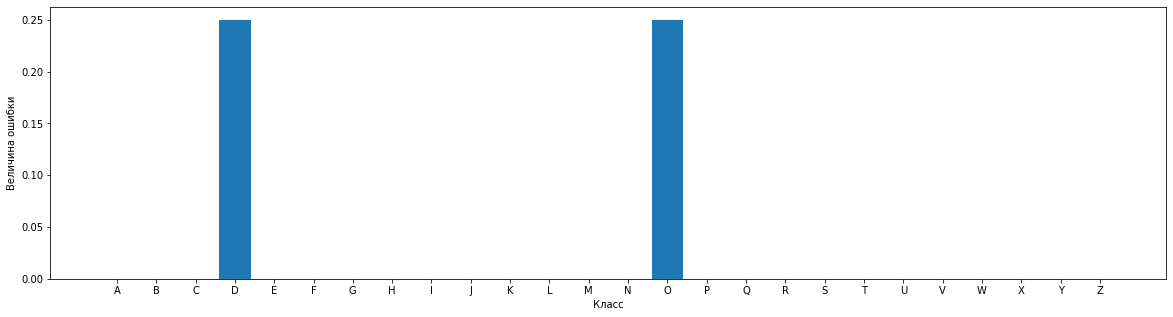

In [27]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(np.arange(len(class_names)), errors)
plt.xticks(np.arange(len(class_names)), class_names)
plt.xlabel('Класс')
plt.ylabel('Величина ошибки')
plt.savefig(path_prefix + 'error-by-class-dist.png', dpi=96, bbox_inches='tight', pad_inches=0.1)